<a href="https://colab.research.google.com/github/Location-Artistry/GEO-NOTEBOOKS/blob/main/imagin_arcgis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1  STYLE="font-size:60px">Managing ArcGIS Online with the Python API </h1>
<h2  STYLE="font-size:50px">IMAGIN Conference 2024 </h1>
<h3  STYLE="font-size:30px">Eric Kerney - Geospatial Developer @ Airspace Link Inc. - IMAGIN Board</h3>
    
<br />

<br />
<br />

---
<br />
<br />

In [ ]:
%%html
<a href='https://airspacelink.com/'>https://airspacelink.com/</a>
<iframe src="https://airspacelink.com/" width="1200" height="600"></iframe>

<br />

---
<br />

In [ ]:
%%html
<a href='https://developers.arcgis.com/python/guide/overview-of-the-arcgis-api-for-python/'>https://developers.arcgis.com/python/guide/overview-of-the-arcgis-api-for-python/</a>
<iframe src="https://developers.arcgis.com/python/guide/overview-of-the-arcgis-api-for-python/" width="1200" height="720"></iframe>

<br />
<br />
<h2  STYLE="font-size:50px">Best of All... No License Required!</h1>
<br />
<br />

<h2  STYLE="font-size:50px">But... how can it help me?</h2>

- Faster searching of AGOL/Portal Resources
- Avoids hassles waiting for UI to load in AGOL Web UI
- Ability to quickly manage and view Users, Content, & Apps
- Quickly view WebMap and App dependencies
- View all of the content owned by a specific user
- Create and publish new items
- CLone items from DEV to PROD, or from Portal to Portal
- Allows for programmatic and automated workflows
- Potentially Save many hours of manual staff time
<br />
<br />
<br />
<br />
<br />

<h2  STYLE="font-size:50px">What are the Pitfalls?</h2>

- Setting up Python & Development Environment
- Python learning curve for non-coders
- Python dependencies can be inconsistent with version upgrades
- arcgis libraries don't always play nice with others &#x1F636;
- Takes time/resources investment to payoff
<br />
<br />
<br />
<br />

<h2  STYLE="font-size:50px">What we will do today</h2>

## Section 1
1. Python & Notebook Setup
2. Python basics - [IMAGIN 2023 Python Basics & GeoPandas Notebook](https://github.com/Location-Artistry/GEO-NOTEBOOKS/blob/main/GeoPandas4GeoSpatial.ipynb)
3. Connect to AGOL via python api
4. View organization info: Users & Groups
5. Search and View Content
6. Create interactive maps! (*impress your boss*)
7. Clone content between Portals
8. Make a reuseable function
## Section 2 ???
1. Creating a simple Online GIS framework
2. Load Open GIS Data from the State of Michigan
3. View information and maps of loaded data
4. Create & Publish new AGOL Items from Data!
5. Confirm new Services in AGOL
6. Refactor this code into additional functions
7. Edit Feature Properties!!
8. Update our Services with other data sources
<br />
<br />
<br />
<br />

<h3  STYLE="font-size:40px">Getting Setup</h3>

### Choose A Jupyter Notebook Environment
- ArcGIS Pro Jupyter Notebook - [ArcGIS Pro ^2.5](https://www.esri.com/arcgis-blog/products/arcgis-pro/analytics/introducing-arcgis-notebooks-in-arcgis-pro/)
- Standalone Jupyter Notebook - Installed with ArcGIS Pro
- Google Colab - Free web based
- VSCode Jupyter Extension - Free best dev setup


## What I Learned
**Google Colab**    
Difficulties getting all of the arcgis python functionality to work outside of esri.   
Previous python demo used Colab, easy to follow along on web from any computer.     
Colab was taking a very long time to install and import arcgis python upon each opening.    
Map widget also would not show in Colab &#x1F641;	   
<br />   

**VSCode Extension**     
Best environment for working with code, Intellisense and code completion.   
Many other extensions and tools for working with Jupyter Notebooks and data visualizations.   
Trying to setup a fresh python environment on Windows Subsystem for Linux was difficult.   
Issues with most recent version of arcgis, had to downgrade to v1.9.1.   
Map widget would also not show with the versions of ipywidgets &#x1F641;
<br />   

**ArcGIS Pro Notebooks**     
Works out of the box, packages pre-installed with Pro.   
Map widget finally works &#x1F642;	   
Limited code completions & extensions capabilities.    
Outputs not nearly as nice as VSCode renderer.   


# Help with Python & Notebooks
### IMAGIN 2023 Presentation
[GeoPandas4GeoSpatial Notebook github](https://github.com/Location-Artistry/GEO-NOTEBOOKS/blob/main/GeoPandas4GeoSpatial.ipynb)
Nice primer on basics of the python language, usage of Jupyter Notebooks   
Pandas and GeoPandas examples for working with dataframes and Geo Data
<br />
<br />

# Can we please see some code!

### Install python api if not in ArcGIS Python Env

```bash
pip install arcgis
pip install geopandas
```
Then import arcgis, geopandas, and pandas

In [ ]:
from arcgis import GIS
import geopandas as gpd
import pandas as pd

### Create a generic GIS instance

In [ ]:
gis = GIS()
gis

GIS @ https://www.arcgis.com version:2024.1

### Browse some of the methods()

In [ ]:
for method in dir(gis):
    print(method)

__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_cert_file
_client_id
_con
_config_is_in_new_format
_datastores
_datastores_list
_expiration
_get_properties
_is_agol
_is_hosted_nb_home
_key_file
_lazy_properties
_lazy_users
_password
_pds
_pfx_to_pem
_portal
_private_service_url
_product_version
_proxy_host
_proxy_port
_public_rest_url
_raise_hosted_nb_error
_referer
_registered_servers
_repr_html_
_server_list
_subscription_information
_timeout
_tools
_try_configure_for_hosted_nb
_uri_validator
_url
_username
_utoken
_verify_cert
api_keys
content
datastore
groups
hub
languages
map
notebook_server
org_settings
properties
regions
servers
update_properties
url
users
velocity
version


### Some of these seem interesting...

In [ ]:
gis.org_settings

### Search for some Content

In [ ]:
gis.content.search(query='Living Atlas', max_items=10)

[<Item title:"Coronavirus COVID-19 (2019-nCoV)" type:Dashboard owner:CSSE_covid19>,
 <Item title:"Building Footprint Extraction - USA" type:Deep Learning Package owner:esri_analytics>,
 <Item title:"USA Soils Map Units" type:Feature Layer Collection owner:esri>,
 <Item title:"We are Living inThe Age of Humans" type:Web Mapping Application owner:StoryMaps>,
 <Item title:"Wildfire Aware" type:Web Mapping Application owner:esri_observations>,
 <Item title:"Community Maps Tour" type:Web Map owner:esri>,
 <Item title:"COVID-19 Cases US" type:Feature Layer Collection owner:CSSE_covid19>,
 <Item title:"Tree Point Classification" type:Deep Learning Package owner:esri_analytics>,
 <Item title:"Living Atlas Contributor App" type:Web Mapping Application owner:esri>,
 <Item title:"Rondonia Land Cover Change from 1992 to 2020" type:Web Map owner:EsriTrainingSvc>]

In [ ]:
results = gis.content.search(query='Living Atlas', max_items=10)
for item in results:
    print(f'title: {item.title} - type: {item.type}')
    # display(item)

title: Coronavirus COVID-19 (2019-nCoV) - type: Dashboard
title: Building Footprint Extraction - USA - type: Deep Learning Package
title: USA Soils Map Units - type: Feature Service
title: We are Living inThe Age of Humans - type: Web Mapping Application
title: Wildfire Aware - type: Web Mapping Application
title: Community Maps Tour - type: Web Map
title: COVID-19 Cases US - type: Feature Service
title: Tree Point Classification - type: Deep Learning Package
title: Living Atlas Contributor App - type: Web Mapping Application
title: Rondonia Land Cover Change from 1992 to 2020 - type: Web Map


### Get a Specific Item

In [ ]:
results = gis.content.search(query='Living Atlas', max_items=10)
for i, item in enumerate(results):
    print(f'{i} - title: {item.title} - type: {item.type}')
item = results[6]
itemInfo = gis.content.get(item.id)
itemInfo

0 - title: Coronavirus COVID-19 (2019-nCoV) - type: Dashboard
1 - title: Building Footprint Extraction - USA - type: Deep Learning Package
2 - title: USA Soils Map Units - type: Feature Service
3 - title: We are Living inThe Age of Humans - type: Web Mapping Application
4 - title: Wildfire Aware - type: Web Mapping Application
5 - title: Community Maps Tour - type: Web Map
6 - title: COVID-19 Cases US - type: Feature Service
7 - title: Tree Point Classification - type: Deep Learning Package
8 - title: Living Atlas Contributor App - type: Web Mapping Application
9 - title: Rondonia Land Cover Change from 1992 to 2020 - type: Web Map


<Item title:"COVID-19 Cases US" type:Feature Layer Collection owner:CSSE_covid19>

In [ ]:
# Print all of the information/methods available for that method
for key, value in itemInfo.items():
    print(f'{key}: {value}')

### Connect to Your AGOL/Portal
Create a login function that prompts for userID & password

In [ ]:
import getpass
def loginAGOL(portal: str='https://www.arcgis.com'):
    userID = input(f'ArcGIS Online USER ID: ')
    pwd = getpass.getpass('PASSWORD: ')
    try:
        gis = GIS(portal, userID, pwd)
        print(f'SUCCESS - CONNECTED TO: {gis.users.me.username} ACCOUNT as <gis>')
        print(gis)
    except:
            print(f'ERROR DID NOT CONNECT TO: {userID}')
    return gis

In [ ]:
gis2 = loginAGOL()

SUCCESS - CONNECTED TO: migeodev ACCOUNT as <gis>
GIS @ https://micFdsPnRKqSu66U.maps.arcgis.com version:2024.1


### Search function to reduce repitition

In [ ]:
def searchContent(gis, query: str, item_type: str, max_items: int):
    results = gis.content.search(query=(f'title: {query}'), max_items=max_items, item_type=item_type)
    for i, item in enumerate(results):
        print(f'{i} - title: {item.title} - type: {item.type}')
    return results

In [ ]:
query = 'water'
item_type = ['Feature Service', 'Web Map', 'Dashboard', 'Web Mapping Application']
max_items = 10
results = searchContent(gis=gis2, query=query, item_type=item_type[1], max_items=max_items)

### View Users and Groups

In [ ]:
# groups = gis2.groups.search()
user = gis2.users.search()[0]
user.items(max_items=10)
# user.folders

[<Item title:"Default API Key" type:API Key owner:migeodev>,
 <Item title:"wayneGroundObs" type:GeoJson owner:migeodev>,
 <Item title:"wayneGroundObs" type:Feature Layer Collection owner:migeodev>,
 <Item title:"Layer_1" type:Feature Layer Collection owner:migeodev>]

In [ ]:
imagin_demo_user = gis2.users.create(
    username = 'imagin_demo_user', password = 'imagin2024', firstname = 'imagin', lastname = '2024',
    email = 'python@esri.com', description = 'Demonstrating how to create users using ArcGIS Python API')

## Time for Maps!

In [ ]:
map = gis2.map()
map

In [ ]:
map = gis2.map('Detroit')
map.basemap = "topo-vector"
map.zoom = 10

In [ ]:
basemaps = map.basemaps

In [ ]:
map.basemap = basemaps[5]
map

In [ ]:
from ipywidgets import *
map.layout=Layout(flex='1 1', height='1000px')
map

### Basemap Data ETL

<AxesSubplot:>

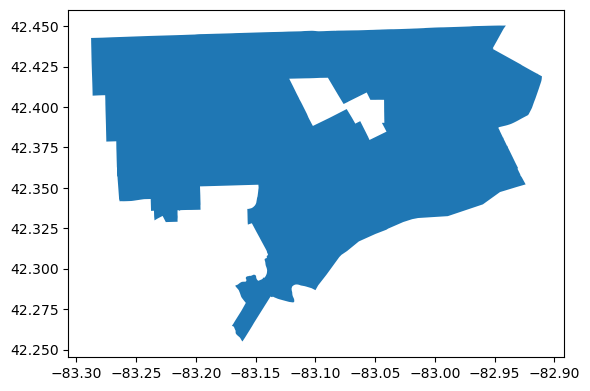

In [ ]:
url = 'https://services2.arcgis.com/qvkbeam7Wirps6zC/arcgis/rest/services/City_of_Detroit_Boundary/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson'
gdf = gpd.read_file(url)
gdf.plot()

In [ ]:
gdf.to_file('detroit.geojson', driver="GeoJSON")

In [ ]:
item_properties = {
    "title": "Detroit Boundary 222",
    "description": "City of Detroit Boundary",
    "tags": "Detroit",
    "type": "GeoJson"
}

geojson_file_path = 'detroit.geojson'
geojson_item = gis2.content.add(item_properties, geojson_file_path)

new_service = geojson_item.publish()
new_service

<Item title:"Detroit Boundary 222" type:Feature Layer Collection owner:migeodev>

In [ ]:
snippet = 'The boundary of the city of Detroit, sourced from the Michigan Geographic Framework A boundary file for the city of Detroit - this is not clipped to the coastline.'
description = 'Detroit Boundary from the City of Detroit Open Data Portal'
terms_of_use = 'FOR INTERNAL USE ONLY'
credits = 'City of Detroit Open Data Portal'
tags = ['Michigan','MGF']

item_properties = {'snippet' : snippet, 'description' : description, 'licenseInfo' : terms_of_use, 'accessInformation' : credits, 'tags' : tags}

new_service.update(item_properties)

True

In [ ]:
urls = [
    ['https://services2.arcgis.com/qvkbeam7Wirps6zC/arcgis/rest/services/City_of_Detroit_Boundary/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson', 'detroit_bound'],
    ['https://services2.arcgis.com/qvkbeam7Wirps6zC/arcgis/rest/services/MasterPlan1/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson', 'master_plan'],
    ['https://services2.arcgis.com/qvkbeam7Wirps6zC/arcgis/rest/services/SMART_Bus_Routes/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson', 'bus_routes'],
    ['https://services2.arcgis.com/qvkbeam7Wirps6zC/arcgis/rest/services/QLine_Route/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson', 'qline_route'],
    ['https://services2.arcgis.com/qvkbeam7Wirps6zC/arcgis/rest/services/building_permits_2023/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson', 'build_permits']
]

In [ ]:
def loadAndSaveGeoJSON(urls: list):
    for url in urls:
        gdf = gpd.read_file(url[0])
        gdf.to_file(f'{url[1]}.geojson', driver="GeoJSON")
        gdf.plot()

https://services2.arcgis.com/qvkbeam7Wirps6zC/arcgis/rest/services/City_of_Detroit_Boundary/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson
detroit_bound
https://services2.arcgis.com/qvkbeam7Wirps6zC/arcgis/rest/services/MasterPlan1/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson
master_plan
https://services2.arcgis.com/qvkbeam7Wirps6zC/arcgis/rest/services/SMART_Bus_Routes/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson
bus_routes
https://services2.arcgis.com/qvkbeam7Wirps6zC/arcgis/rest/services/QLine_Route/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson
qline_route
https://services2.arcgis.com/qvkbeam7Wirps6zC/arcgis/rest/services/building_permits_2023/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson
build_permits


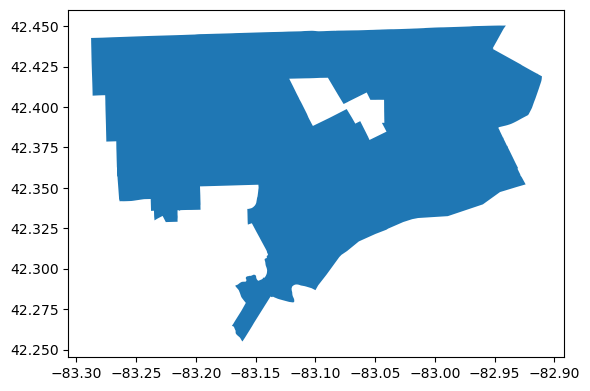

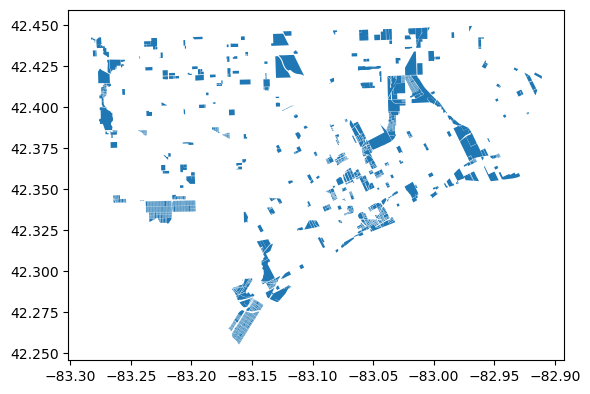

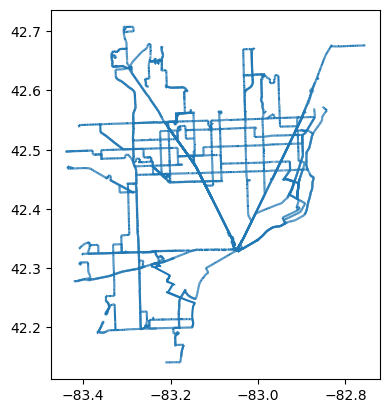

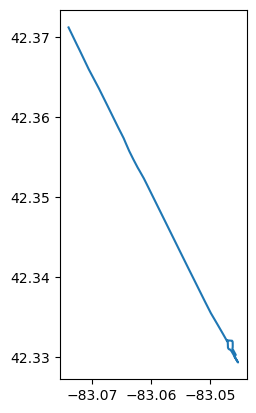

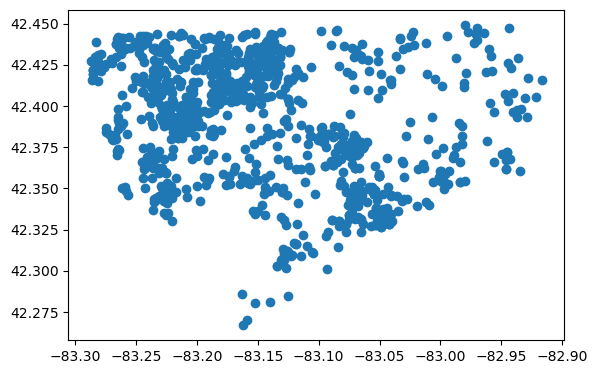

In [ ]:
loadAndSaveGeoJSON(urls)